# Web Analytics - Assignment 2

*June 10, 2017*

## Group 1 Members:
* Mauricio Alarcon
* Sekhar Mekala
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh

In this assignment, we will be creating a graph based on the Super Heros data set available at https://www.kaggle.com/csanhueza/the-marvel-universe-social-network. In this assignment we will be identifying the important super hero in Marvel Comics based on 2 measures of centrality. 

Importing all the required packages.

In [1]:
import networkx as nx
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import sklearn

## Data
We downloaded the following 3 datasets from  https://www.kaggle.com/csanhueza/the-marvel-universe-social-network.

* nodes.csv - Contains comma separated values of character and the character type. The type of the character can be either *hero* or *comic*.

* edges.csv - Contains comma separated values of the hero's name, and the comic book name.

* hero-network.csv - Contains comma separated values of the hero1 and hero2 who appeared together in a comic.

In this assignment we will be using the file *hero-network.csv* to determine who is the important superhero, based on 2 measures of centrality.

We will build an undirected graph using the data present in *hero-network.csv* file. It has 2 columns *hero1* and *hero2*. The data in this file represents the superheros who appeared together in a comic book.

### Reading and cleansing the data
We will read the data into a data frame and perform some sanity checks to make sure that the data is suitable for building a graph.

In [5]:
#Read the data into a pandas data frame:
ga_edges = pd.read_csv('./data/hero-network.csv')

#print("Sample rows...")
#display(ga_edges.head())

#print("Summary information of the data is displayed below:")
#display(ga_edges.describe())

#print("\nThe above summary confirms that there are no NA values in the data set, \
#\nand CAPTAIN AMERICA has co-appeared most of the times along with other comic characters.")

#print("\nMaking sure that the same character is NOT listed as hero1 and hero2 for a given row:")

ga_edges.loc[(ga_edges["hero1"] == ga_edges["hero2"])].head()

#print("There are some rows which have both the same hero listed as hero1 and hero2 in the same comic.\n\
#There are {0} such rows. These rows might refer to the comics in which the hero might have \
#appeared in \nmore than one role.\nBut for this project we will eliminate those rows from the data set.\
#".format(sum(ga_edges["hero1"] == ga_edges["hero2"])))

ga_edges = ga_edges.loc[~(ga_edges["hero1"] == ga_edges["hero2"])]

#print("\nThe summary and sample records of the final, cleansed data set are displayed below:")
#display(ga_edges.describe())
#display(ga_edges.head())


### Building the graph
Using the cleansed data, we will build a network graph of super heros.

In [7]:
GA = nx.from_pandas_dataframe(ga_edges,source="hero1",target="hero2")
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167207
Average degree:  52.0408


In [ ]:
## Analysis

We created a graph with 6426 nodes and 167207 edges. Now we will find the following metrics of this graph:

**Diameter**
The diameter of a graph is the greatest distance between any pair of vertices. It can be found by first finding the shortest path between each pair of vertices, the greatest of these paths is the diameter of the graph.

**Degree Centrality**
    The _degree_ of a node is the number of other nodes to which it is connected. NetworkX's _degree centrality_ is calculated by taking the degree of the node and dividing by $n-1$, where $n$ is the number of nodes in the graph.
    $$C_D(u) = \frac{deg(u)}{n-1}$$
    
**Closeness Centrality**
    Closeness Centrality measures how many "hops" it would take to reach every other node in a network (taking the shortest path). It can be informally thought of as "average distance" to all other nodes. In NetworkX, it is the reciprocal of the average value, which normalizes the value in a 0 to 1 range.
    $$C_C(u) = \frac{n-1}{\sum_{v=1,v\ne u}^{n-1}d(v,u)}$$
    
If you take the reciprocal, then you will find the average distance to all other nodes. 

The colseness centrality metric of a node measures the average distance of all other nodes from that node. Lesser the value, better is the node's position to reach most of the nodes. But NetworkX will use the reciprocal of this value, so greater the value of the closeness metric (calculated using NetworkX), closer the node to all other nodes on average. 

In [4]:
nx.is_connected(GA)
nx.number_connected_components(GA)
#only 4 components are connected

4

In [8]:
max_g = max(nx.connected_component_subgraphs(GA), key=len)
min_g = min(nx.connected_component_subgraphs(GA), key=len)
print(nx.info(min_g))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


In [9]:
print(nx.info(max_g))

Name: 
Type: Graph
Number of nodes: 6408
Number of edges: 167151
Average degree:  52.1695


In [18]:
graphs = list(nx.connected_component_subgraphs(GA))
for subg in graphs:
    print(nx.info(subg))

Name: 
Type: Graph
Number of nodes: 6408
Number of edges: 167151
Average degree:  52.1695
Name: 
Type: Graph
Number of nodes: 9
Number of edges: 34
Average degree:   7.5556
Name: 
Type: Graph
Number of nodes: 7
Number of edges: 21
Average degree:   6.0000
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


In [19]:
small_g = graphs[1]
print(nx.info(small_g))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 34
Average degree:   7.5556


In [ ]:
nx.diameter(max_g)
#5

In [19]:
dc = nx.degree_centrality(GA)
sorted(dc.items(),key=lambda x:x[1],reverse=True)[:5]

[('CAPTAIN AMERICA', 0.2966536964980545),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254)]

As per the *Degree Centrality*, CAPTAIN AMERICA has co-appeared with most of the other MARVEL characters, followed by SPIDER-MAN and IRON MAN.  

In [20]:
cc = nx.closeness_centrality(GA)

KeyboardInterrupt: 

In [ ]:
sorted(cc.items(),key=lambda x:x[1],reverse=True)[:5]

The closeness centrality measure also showed the same characters we obtained using Degree Centrality.

In [47]:
print("Average distance to all other characters from CAPTAIN AMERICA is {0} characters".format(1/cc['CAPTAIN AMERICA']))
print("Average distance to all other characters from SPIDER MAN is {0} characters".format(1/cc['SPIDER-MAN/PETER PAR']))
print("Average distance to all other characters from IRON MAN is {0} characters".format(1/cc['IRON MAN/TONY STARK ']))

Average distance to all other characters from CAPTAIN AMERICA is 1.7132436382099152 characters
Average distance to all other characters from SPIDER MAN is 1.7418863922563625 characters
Average distance to all other characters from IRON MAN is 1.7811723554566812 characters


We can note that there is no significant average distance to all other comic characters from CAPTAIN AMERICA, SPIDER MAN and IRON MAN.

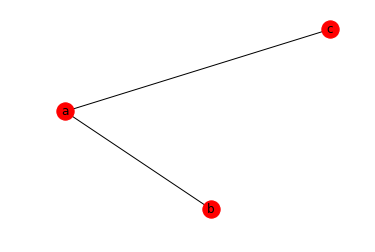

In [21]:
#Example code to draw graph
g=net.Graph()
g.add_edge('a','b')
g.add_edge('a','c')
#g.add_edge('b','c')
layout = nx.spring_layout(g)
nx.draw_networkx_nodes(g,layout)
nx.draw_networkx_labels(g,pos=layout)
nx.draw_networkx_edges(g,pos=layout)
plt.axis("off")
plt.show()

In [22]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


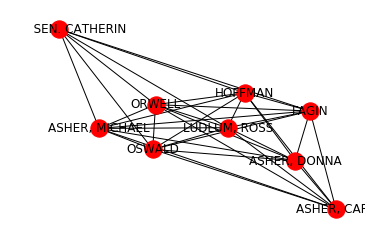

In [21]:
layout2 = nx.spring_layout(small_g)
nx.draw_networkx_nodes(small_g,layout2)
nx.draw_networkx_labels(small_g,pos=layout2)
nx.draw_networkx_edges(small_g,pos=layout2)
plt.axis("off")
plt.show()